**1. 파일 업로드 및 확인**

In [1]:
import pandas as pd

data = pd.read_csv('Bronze_sample.csv')
print(data.head())
print(data.info())


   Unnamed: 0        matchId      gameId gameMode    gameVersion championName  \
0           0  KR_6947512425  6947512425  CLASSIC  14.3.558.8314    TahmKench   
1           1  KR_6926106538  6926106538  CLASSIC  14.2.556.3141           Vi   
2           2  KR_6926106538  6926106538  CLASSIC  14.2.556.3141     Nocturne   
3           3  KR_7019449900  7019449900  CLASSIC  14.7.571.9528     Volibear   
4           4  KR_6930060068  6930060068  CLASSIC  14.2.556.3141      Nidalee   

   championId teamPosition    win  allInPings  ...       kda  \
0       223.0          TOP  False           3  ...  0.428571   
1       254.0       JUNGLE   True           0  ...  3.000000   
2        56.0       JUNGLE  False           0  ...  1.750000   
3       106.0       JUNGLE  False           0  ...  1.000000   
4        76.0       JUNGLE  False           0  ...  0.714286   

   teamDamagePercentage  maxCsAdvantageOnLaneOpponent  \
0              0.135361                           7.0   
1             

**전처리 1: 필요없는 열 삭제**

In [2]:
"""
    matchId, gameId, gameMode, gameVersion, championName는 값이 동일하거나 이미 있는 데이터이므로 해당 열을 삭제함.
    
    삭제 이유는 아래와 같음.
    matchId: 매치된 경기의 ID이므로 예측에 해당되지 않음.
    gameId: 해당 게임의 ID이므로 예측에 해당되지 않음.
    gameMode: 'CLASSIC' 모드로만 예측하기에, 값이 동일하여 삭제함.
    gameVersion: 게임 버전(14 버전 이상만 해당)은 예측에 해당되지 않음.
    championName: 챔피언의 고유 번호(championId) 열이 존재하므로 해당되지 않음.
    teamPosition: NaN 값이 포함되어있고, 팀 포지션 외에도 role 등 겹치는 데이터가 많으므로 제외.
"""
if 'Unnamed: 0' in data.columns:
    data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.drop(['matchId', 'gameId', 'gameMode', 'gameVersion', 'championName'], axis=1, inplace=True)
data = data.dropna(subset=['teamPosition'])
data.head()

,championId,teamPosition,win,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,223.0,TOP,False,3,0.0,5,0,0,11499,14.0,...,0.428571,0.135361,7.0,1.0,8437,8401,8444,8242,9104,9111
1,254.0,JUNGLE,True,0,2.0,11,0,0,11448,14.0,...,3.000000,0.152048,4.0,1.0,9923,8143,8138,8105,9104,9111
2,56.0,JUNGLE,False,0,0.0,9,0,0,10978,13.0,...,1.750000,0.217771,32.6,2.0,8008,9111,9104,8014,8106,8138
3,106.0,JUNGLE,False,0,0.0,2,0,0,4962,8.0,...,1.000000,0.216455,8.0,1.0,8005,9111,9105,8299,8234,8232
4,76.0,JUNGLE,False,0,0.0,6,0,0,10088,13.0,...,0.714286,0.139166,12.0,0.0,8128,8143,8138,8135,8210,8232


**전처리 2: NaN 또는 Null 값 확인 및 처리**

In [3]:
# NaN 및 Null 포함도를 확인하여 결측치를 제거함
print((data.isnull().sum()/len(data)*100).sort_values(ascending=False)[:20])

maxLevelLeadLaneOpponent        2.653981
maxCsAdvantageOnLaneOpponent    2.653981
killParticipation               2.003005
teamDamagePercentage            0.250376
baronTakedowns                  0.100150
enemyJungleMonsterKills         0.100150
takedowns                       0.100150
goldPerMinute                   0.100150
damagePerMinute                 0.100150
dragonTakedowns                 0.100150
turretTakedowns.1               0.100150
gameLength                      0.100150
visionScorePerMinute            0.100150
jungleCsBefore10Minutes         0.100150
controlWardsPlaced              0.100150
wardTakedowns                   0.100150
kda                             0.100150
summoner1Casts                  0.000000
timeCCingOthers                 0.000000
timePlayed                      0.000000
dtype: float64


In [4]:
# 수치형 데이터만 추출하여 각 열의 결측값을 해당 열의 중앙값으로 채움.
numeric = data.select_dtypes(include=['int', 'float'])

columns_to_impute = numeric.columns[1:-4]
for col in columns_to_impute:
    data[col] = data[col].fillna(data[col].median())

In [5]:
# bool 타입의 데이터를 0과 1로 반환
for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

In [6]:
# win 열은 타깃이기에 따로 DataFrame으로 저장
win_columns = pd.DataFrame(data['win'], columns=['win'])
data.drop('win', axis=1, inplace=True)

win_columns

,win
0,0
1,1
2,0
3,0
4,0
...,...
1995,0
1996,0
1997,1
1998,1


In [7]:
# 최종으로 NaN 값이 포함되어있는지 확인
print(data.isnull().sum())

championId       0
teamPosition     0
allInPings       0
assistMePings    0
assists          0
                ..
primaryStyle2    0
primaryStyle3    0
primaryStyle4    0
subStyle1        0
subStyle2        0
Length: 132, dtype: int64


**범주형 데이터와 수치형 데이터 확인**

In [8]:
"""
    범주형 데이터와 수치형 데이터 출력하는 코드임.

    단, DataFrame 구조가 어떻냐에 따라 수정이 필요함.

    이 부분은 학습하기 위한 데이터가 확정이 될 시 변환이 될 것임.

    범주형열과 수치형열은 아래와 같아야 됨.
    Categorical:
        ['teamPosition', 'individualPosition', 'lane', 'role', 'championId', 
        'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2']
    numeric:
        ['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', ...]
    
"""
numeric_columns = data.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

categorical_columns.append(numeric_columns[0])
categorical_columns.extend(numeric_columns[-6:])
del numeric_columns[-6:]
del numeric_columns[0]

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numeric_columns)

Categorical Columns: ['teamPosition', 'individualPosition', 'lane', 'role', 'championId', 'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2']
Numerical Columns: ['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'largestCriticalStrike', 'largestKill

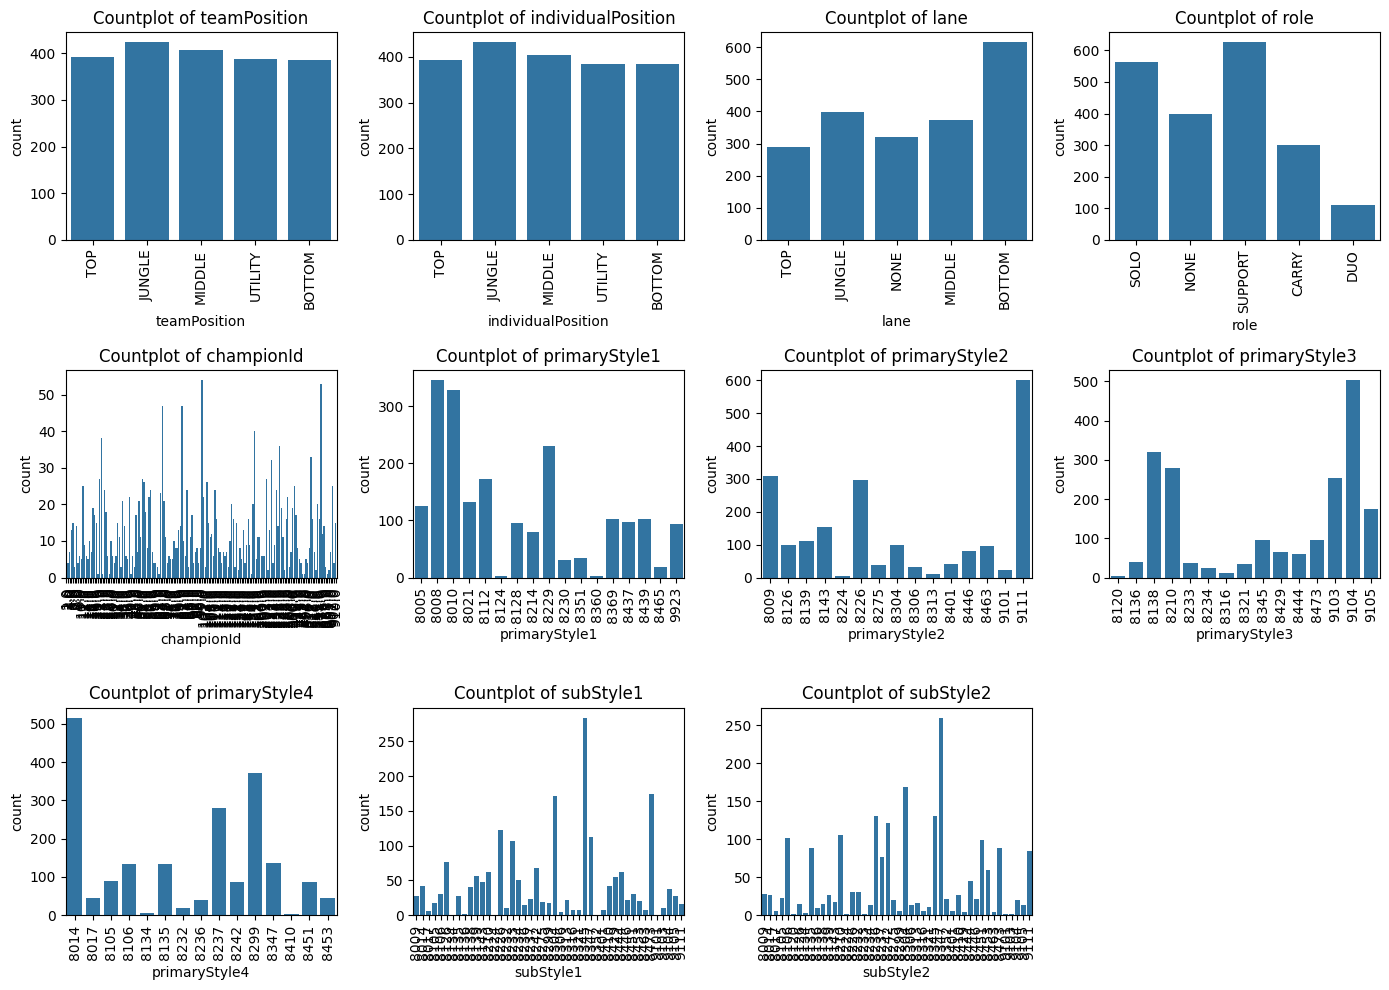

In [9]:
# 동일 값 포함도 그래프 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**전처리 3: 인코딩 및 임베딩**

In [10]:
"""
    범주형 데이터를 수치화하고, 생성된 레이블 인코더를 파일로 저장하여 다시 사용하는 작업임.
    
    범주형 값을 수치형 값으로 바꾸는데 LabelEncoder 클래스를 사용함.
    열(columns)을 많이 추가하지 않고, 각 범주를 고유한 정수로 매핑하는 방법을 택함.
    OneHotEncoder으로 바꾸는 방법도 생각하고 있고, 이는 이야기해서 정하는 것으로 하겠음.

    LabelEncoder의 단점으로는 데이터에 들어가있는 크기에 따라 정수로 매핑하므로 범주형 데이터 예측하는데 일관성이 필요함.
    이를 위하여 label_encoder_(열).pkl로 저장하여 일관성을 가지도록 따로 저장함.
    이렇게 저장된 파일은 나중에 레이블 인코더를 다시 로드하여 사용가능토록 함.

    수치형 데이터는 StandardScaler 클래스를 사용함.
"""
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pickle

label_encoders = {feature: LabelEncoder() for feature in categorical_columns}
for feature in categorical_columns:
    data[feature] = label_encoders[feature].fit_transform(data[feature])

for feature, encoder in label_encoders.items():
    with open(f'Label_pkl/label_encoder_{feature}.pkl', 'wb') as f:
        pickle.dump(encoder, f)

scaler = StandardScaler()
X_num = scaler.fit_transform(data[numeric_columns])

data.head(10)


,championId,teamPosition,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,championTransform,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,125,3,3,0.0,5,0,0,11499,14.0,0,...,0.428571,0.135361,7.0,1.0,13,10,10,9,42,45
1,133,1,0,2.0,11,0,0,11448,14.0,0,...,3.000000,0.152048,4.0,1.0,16,3,2,2,42,45
2,50,1,0,0.0,9,0,0,10978,13.0,0,...,1.750000,0.217771,32.6,2.0,1,14,13,0,4,10
3,88,1,0,0.0,2,0,0,4962,8.0,0,...,1.000000,0.216455,8.0,1.0,0,14,14,10,17,16
4,65,1,0,0.0,6,0,0,10088,13.0,0,...,0.714286,0.139166,12.0,0.0,6,3,2,5,12,16
5,58,1,1,11.0,10,2,0,17049,17.0,0,...,6.000000,0.332621,58.0,4.0,2,14,13,0,23,30
6,73,2,0,0.0,1,0,0,7965,11.0,0,...,9.000000,0.332753,29.0,1.0,3,0,14,10,36,40
7,73,2,1,2.0,8,0,0,14665,15.0,0,...,2.000000,0.095930,5.0,2.0,4,3,2,3,36,35
8,47,4,0,0.0,1,0,0,2741,6.0,0,...,0.500000,0.124141,9.0,1.0,6,1,2,3,12,20
9,149,4,0,0.0,3,0,0,4381,8.0,0,...,3.000000,0.230370,2.0,2.0,8,5,3,8,28,30


**TabTransformer 설정 및 학습**

In [11]:
# 학습에 필요한 라이브러리
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [12]:
"""
    텐서 형태로 변환하여, 이를 PyTorch의 데이터 로더에 로드하는 과정임.

    범주형 데이터(X_cat)와 수치형 데이터(X_num)를 PyTorch 텐서로 변환함.
    범주형 데이터는 정수 유형을 사용하고, 수치형 데이터 및 타깃은 부동소수점을 이용해야함.

    이러한 Tensor들의 조합으로 데이터셋을 생성하고, 데이터셋을 배치 크기로 나누고, 필요에 따라 데이터를 섞어 모델의 학습을 도울 수 있음.
    학습 데이터 로더는 데이터를 섞어 과적합을 방지하고, 검증 데이터 로더는 데이터를 섞지 않음.
"""
X_cat = torch.tensor(data[categorical_columns].values, dtype=torch.long)
X_num = torch.tensor(X_num, dtype=torch.float)
y = torch.tensor(win_columns.values, dtype=torch.float)

dataset = TensorDataset(X_cat, X_num, y)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset, batch_size=64, shuffle=False)

In [13]:
"""
    TabTransformer 초기 설정 클래스. TabTransformer은 nn.Module을 상속받아 신경망 모델을 구성함.
    
    아래는 각 메소드에 대한 설명임.
    __init__:
        모델 초기화할 때 필요한 파라미터를 받음.
        아래는 매개변수에 대한 설명임.
            num_categories: 각 범주형 변수의 고유한 카테고리 수의 리스트
            embed_dim: 임베딩 차원, 즉 범주형 변수를 변환할 벡터의 크기
            num_head: 멀티 헤드 어텐션에서의 헤드 수
            num_layers: 변형기 인코더의 레이어 수
            dropout_rate: 드롭아웃 비율, 모델이 과적합되는 것을 방지하는데 도움이 됨
        아래는 변수에 대한 설명임.
            임베딩 및 변형기 인코더 설정 -
            self.embeddings: nn.Embedding은 각 범주형 변수의 고유한 값을 embed_dim 크기의 밀집 벡터로 변환함
            encoder_layer: nn.TransformerEncoderLayer는 변형기의 기본 블록으로, 주어진 설정으로 초기화됨
            self.transformer_encoder: nn.TransformerEncoder는 여러 개의 encoder_layer로 구성되며, 입력 데이터의 복잡한 표현을 학습함

            회귀기 및 가중치 초기화-
            self.regressor: 최종적으로 변형된 범주형 데이터와 수치형 데이터를 결합한 후, 결과를 예측하는 선형 레이어임
            
    __init_weights(self):
        가중치 초기화 함수이며, Xavier 초기화 방법을 사용하여 선형 레이어와 임베딩 레이어의 가중치를 초기화함.
        이러한 방법은 모델의 수렴을 도와 안정적인 학습을 촉진함.

    forward():
        모델이 학습 및 예측을 수행하는 방법을 정의함
        범주형 데이터는 각 카테고리에 대해 임베딩되고, 이 임베딩들은 스택되어 변형기 인코더로 전달됨.
        변형기 인코더의 출력은 수치형 데이터와 함께 결합되어 최종 예측을 위한 선형 레이어로 전달됨.     
        
"""
class TabTransformer(nn.Module):
    def __init__(self, num_categories, embed_dim, num_heads, num_layers, dropout_rate):
        super(TabTransformer, self).__init__()
        self.embed_dim = embed_dim
        self.embeddings = nn.ModuleList([nn.Embedding(num_categories[i], embed_dim) for i in range(len(num_categories))])
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout_rate)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.regressor = nn.Linear(embed_dim * len(num_categories) + len(numeric_columns), 1)
        
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.regressor.weight)
        for embedding in self.embeddings:
            nn.init.xavier_uniform_(embedding.weight)
        
    def forward(self, x_cat, x_num):
        x = [self.embeddings[i](x_cat[:, i]) for i in range(len(self.embeddings))]
        x = torch.stack(x, dim=1)
        x = self.transformer_encoder(x).view(x.size(0), -1)
        x = torch.cat((x, x_num), dim=1)
        output = self.regressor(x)
        return output

In [14]:
"""
    학습을 위한 함수를 설정하는 코드임.

    train_losses와 val_losses 리스트를 사용하여 각 에포크에서의 평균 훈련 및 검증 손실을 저장함.
    이는 그래프에서 표현하기 위함임.

    tqdm 라이브러리를 사용하여 학습 및 검증 과정의 진행 상황을 시각적으로 표현하였음.

    optimizer.zero_grad()를 호출하여 이전 그래디언트를 초기화함.
    model(x_cat, x_num)을 통해 모델의 출력을 계산함.
    criterion(outputs.squeeze(), labels)로 손실을 계산하고, loss.backward()로 그래디언트를 계산함.
    optimizer.step()으로 가중치를 업데이트함.

    model.eval()을 호출하여 모델을 평가 모드로 설정함.
    torch.no_grad() 블록 내에서 모델을 평가하여 추가적인 그래디언트 계산을 방지함.

    이를 matplotlib을 사용하여 훈련 및 검증 손실을 그래프로 그려 학습 과정을 시각화 하였음.
"""

from tqdm import tqdm
import torch
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve
import numpy as np
import matplotlib.pyplot as plt

def train(model, train_loader, val_loader, epochs, criterion, optimizer, device):
    model.train()

    # epochs 별 손실 저장
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        train_loss = 0
        # tqdm 추가 - 학습 데이터 로더에 적용
        for (x_cat, x_num, labels) in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(x_cat, x_num)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss_avg = train_loss / len(train_loader)
        train_losses.append(train_loss_avg)

        # 검증 과정
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for (x_cat, x_num, labels) in tqdm(val_loader, desc=f"Epoch {epoch+1} Validation"):
                x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
                outputs = model(x_cat, x_num)
                val_loss += criterion(outputs.squeeze(), labels).item()
        val_loss_avg = val_loss / len(val_loader)
        val_losses.append(val_loss_avg)
        
        print(f"Epoch {epoch+1}: Train Loss = {train_loss / len(train_loader) * 100:.2f}%, Val Loss = {val_loss_avg * 100:.2f}%")

    # 손실 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


c:\Users\htu12\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch 1 Training:   0%|          | 0/32 [00:00<?, ?it/s]c:\Users\htu12\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
c:\Users\htu12\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input s

Epoch 1: Train Loss = 144.13%, Val Loss = 93.94%


Epoch 2 Validation: 100%|██████████| 32/32 [00:00<00:00, 121.76it/s]


Epoch 2: Train Loss = 85.14%, Val Loss = 76.94%


Epoch 3 Validation: 100%|██████████| 32/32 [00:00<00:00, 122.47it/s]


Epoch 3: Train Loss = 73.95%, Val Loss = 70.72%


Epoch 4 Validation: 100%|██████████| 32/32 [00:00<00:00, 133.50it/s]


Epoch 4: Train Loss = 68.03%, Val Loss = 65.71%


Epoch 5 Validation: 100%|██████████| 32/32 [00:00<00:00, 126.45it/s]


Epoch 5: Train Loss = 63.40%, Val Loss = 59.97%


Epoch 6 Validation: 100%|██████████| 32/32 [00:00<00:00, 130.13it/s]


Epoch 6: Train Loss = 58.93%, Val Loss = 60.06%


Epoch 7 Validation: 100%|██████████| 32/32 [00:00<00:00, 122.99it/s]


Epoch 7: Train Loss = 56.01%, Val Loss = 53.30%


Epoch 8 Validation: 100%|██████████| 32/32 [00:00<00:00, 139.82it/s]


Epoch 8: Train Loss = 53.42%, Val Loss = 51.95%


Epoch 9 Validation: 100%|██████████| 32/32 [00:00<00:00, 123.05it/s]


Epoch 9: Train Loss = 50.29%, Val Loss = 48.25%


Epoch 10 Validation: 100%|██████████| 32/32 [00:00<00:00, 108.76it/s]


Epoch 10: Train Loss = 48.82%, Val Loss = 48.32%


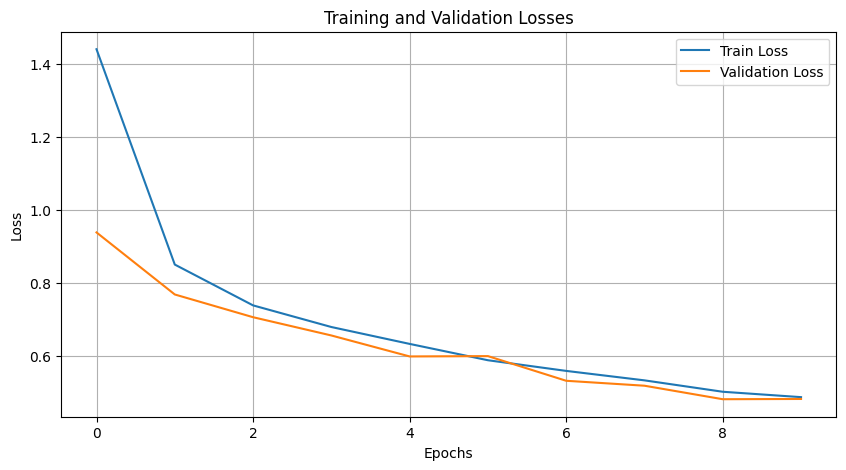

In [16]:
"""
    PyTorch 라이브러리를 사용하여 심층 신경망을 구성하고 훈련하는 과정임.

    각 변수에 대한 설명은 아래와 같음.

    num_categories:
        범주형 열의 고유한 값의 수를 계산하여 임베딩 시 입력 크기를 결정하는데 사용되는 변수.
    
    model:
        초기 설정된 TabTransformer() 모델을 사용하여 범주형 데이터를 처리함.
        매개변수:
            num_categories: 범주형 변수의 고유한 카테고리 수 목록
            embed_dim: 임베딩 차원으로, 범주형 변수가 임베딩되는 벡터 크기
            num_heads: 트랜스포머 내의 멀티헤드 어텐션에서 사용되는 헤드의 수
            dropout_rate: 학습 중 무작위로 입력의 일부를 드롭아웃하여 과적합을 방지하는 비율
    
    criterion:
        손실함수로 MSE(평균 제곱 오차)를 사용함. 이는 회귀 문제에서 예측값과 실제값의 차이의 제곱의 평균을 계산함.

    optimizer:
        최적화 알고리즘으로 Adam()을 사용함. 이는 L2 규제를 사용함으로서 과적합을 방지하기 위함임.
        매개변수:
            model.parameters: 최적화할 모델 파라미터
            lr: 학습률, 학습 과정에서 파라미터를 업데이터 하는 정도를 결정함.
            weight_decay: L2 규제 강도 설정
    
    device:
        모델을 실행할 하드웨어를 결정함. CUDA를 사용할 시 GPU에서 모델을 실행하고, 그렇지 않을 시 CPU에서 실행함.


    이러한 설정을 사전에 설정한 train() 함수를 이용하여 훈련을 실행함.
"""
num_categories = [data[cat].nunique() for cat in categorical_columns]
model = TabTransformer(num_categories=num_categories, embed_dim=32, num_heads=8, num_layers=6, dropout_rate=0.1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.01)  # L2 규제 추가
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train(model, train_loader, val_loader, epochs=10, criterion=criterion, optimizer=optimizer, device=device)

**모델 성능 확인, 저장**

In [17]:
"""
    모델 성능을 평가하고 시각화하는 함수를 작성하였음.

    이 역시 model.eval()을 사용하여 평가 모드로 설정하고, torch_no_grad()로 그래디언트 계산을 방지함.
"""

# 성능 지표 계산
def evaluate(model, loader, device):
    model.eval()
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for (x_cat, x_num, labels) in loader:
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            outputs = model(x_cat, x_num)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    
    all_labels = np.concatenate(all_labels)
    all_outputs = np.concatenate(all_outputs)
    predictions = (all_outputs > 0.5).astype(int)
    
    accuracy = accuracy_score(all_labels, predictions)
    precision = precision_score(all_labels, predictions)
    recall = recall_score(all_labels, predictions)
    f1 = f1_score(all_labels, predictions)
    roc_auc = roc_auc_score(all_labels, all_outputs)
    
    return accuracy, precision, recall, f1, roc_auc

In [18]:
# 성능 지표 시각화
def plot_metrics(metrics):
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
    plt.figure(figsize=(10, 6))
    plt.bar(metric_names, metrics, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.ylim(0, 1)
    for i, value in enumerate(metrics):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics')
    plt.show()

In [19]:
# ROC AUC 시각화 (1에 가까울수록 좋은 성능임)
def plot_roc_curve(model, loader, device):
    model.eval()
    all_labels = []
    all_outputs = []
    
    with torch.no_grad():
        for (x_cat, x_num, labels) in loader:
            x_cat, x_num, labels = x_cat.to(device), x_num.to(device), labels.to(device)
            outputs = model(x_cat, x_num)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())
    
    all_labels = np.concatenate(all_labels)
    all_outputs = np.concatenate(all_outputs)
    
    fpr, tpr, thresholds = roc_curve(all_labels, all_outputs)
    roc_auc = auc(fpr, tpr)  # 계산된 AUC 점수
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

정확도: 0.55
정밀도: 0.54
재현율: 0.69
F1 점수: 0.61
ROC AUC: 0.58


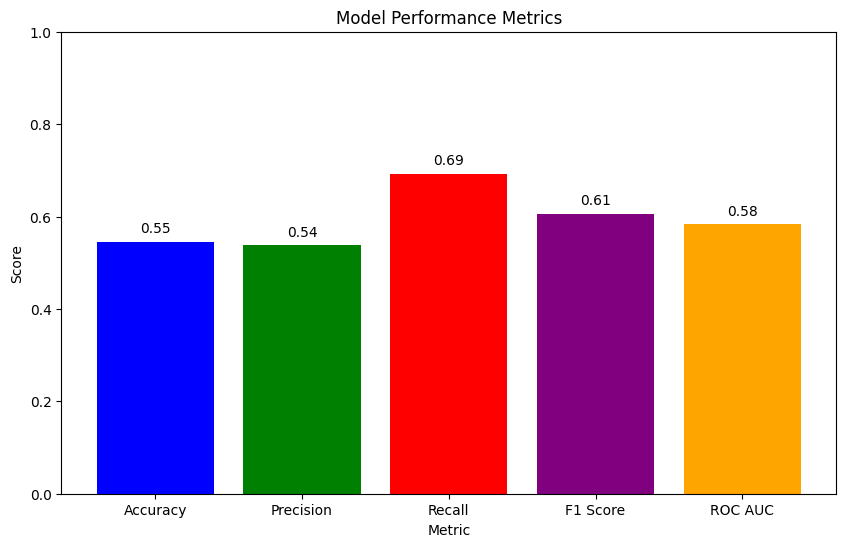

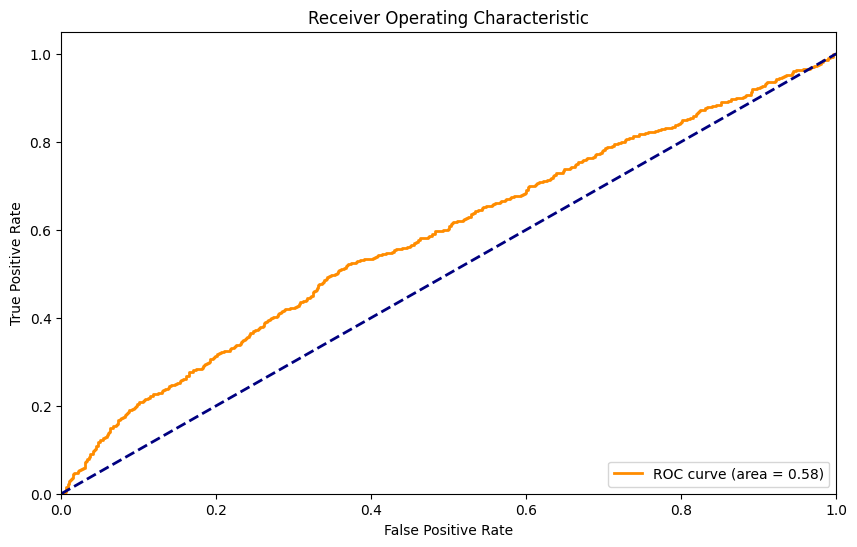

In [20]:
# 성능 출력
accuracy, precision, recall, f1, roc_auc = evaluate(model, val_loader, device)
print(f"정확도: {accuracy:.2f}")
print(f"정밀도: {precision:.2f}")
print(f"재현율: {recall:.2f}")
print(f"F1 점수: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# 성능 지표 시각화
plot_metrics([accuracy, precision, recall, f1, roc_auc])
plot_roc_curve(model, val_loader, device)

In [21]:
# 훈련된 모델을 .pth로 저장
torch.save(model.state_dict(), 'TabTransformer_model.pth')

**모델 실제 사용 시 과정과 결과**
-- 아래는 아직 개발 중에 있음

실제 사용 시 챔피언 종류(championId, championName)와 룬(perk)만을 이용하여 조합을 보고 예측을 해야한다. (Input 2개 -> Output 1개)

> 두 가지 방법
1. 10명 개개인의 최근 5게임 전적을 평균내어 할 것인가
2. Vector Store 방법을 이용할 것인가

In [22]:
test_data = pd.read_csv('test_data_2.csv')

test_data.head()

,Unnamed: 0.1,Unnamed: 0,matchId,gameId,gameMode,gameVersion,championName,championId,teamPosition,win,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,3,259599,KR_6896470978,6896470978,CLASSIC,14.1.552.9668,LeeSin,64.0,JUNGLE,True,...,20.0,0.189453,8.0,2.0,8010,9111,9104,8014,8304,8347
1,4,259600,KR_6896470978,6896470978,CLASSIC,14.1.552.9668,Zed,238.0,MIDDLE,True,...,2.5,0.196527,18.5,2.0,8369,8313,8321,8347,8210,8237
2,5,302996,KR_6896470978,6896470978,CLASSIC,14.1.552.9668,Leona,89.0,UTILITY,True,...,21.0,0.152658,19.0,3.0,8351,8306,8345,8347,8473,8242
3,7,324361,KR_6896470978,6896470978,CLASSIC,14.1.552.9668,Aatrox,266.0,TOP,True,...,1.5,0.143189,0.0,0.0,8010,9111,9105,8299,8473,8453
4,8,338538,KR_6896470978,6896470978,CLASSIC,14.1.552.9668,Caitlyn,51.0,BOTTOM,True,...,6.0,0.318173,8.4,2.0,8021,8009,9103,8014,8233,8236


In [23]:
if 'Unnamed: 0' in test_data.columns:
    test_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

test_data.drop(['matchId', 'gameId', 'gameMode', 'gameVersion', 'championName'], axis=1, inplace=True)
test_data.drop('win', axis=1, inplace=True)

for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

test_data.head(10)

,championId,teamPosition,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,championTransform,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,64.0,JUNGLE,0,0.0,5,0,0,12257,14.0,0,...,20.000000,0.189453,8.0,2.0,8010,9111,9104,8014,8304,8347
1,238.0,MIDDLE,0,1.0,4,0,0,14738,16.0,0,...,2.500000,0.196527,18.5,2.0,8369,8313,8321,8347,8210,8237
2,89.0,UTILITY,0,6.0,16,0,0,12148,14.0,0,...,21.000000,0.152658,19.0,3.0,8351,8306,8345,8347,8473,8242
3,266.0,TOP,0,2.0,3,0,0,13615,15.0,0,...,1.500000,0.143189,0.0,0.0,8010,9111,9105,8299,8473,8453
4,51.0,BOTTOM,0,0.0,9,0,0,11854,14.0,0,...,6.000000,0.318173,8.4,2.0,8021,8009,9103,8014,8233,8236
5,233.0,JUNGLE,0,0.0,1,0,0,10043,13.0,0,...,0.125000,0.119194,12.0,1.0,8010,9111,9105,8014,8347,8304
6,74.0,TOP,0,1.0,1,0,0,14392,15.0,0,...,0.750000,0.369927,69.0,2.0,8229,8226,8233,8237,8304,8345
7,526.0,UTILITY,0,0.0,5,0,0,8495,11.0,0,...,1.000000,0.060469,1.0,1.0,8351,8306,8316,8347,8275,8232
8,222.0,BOTTOM,0,0.0,2,0,0,9608,12.0,0,...,0.666667,0.212379,14.0,1.0,8008,8009,9103,8014,8233,8236
9,777.0,MIDDLE,0,0.0,1,0,0,11947,14.0,0,...,0.555556,0.238031,23.0,1.0,8008,9111,9104,8299,8473,8453


In [24]:
# 범주형 데이터 인코딩
test_categorical_columns = test_data.select_dtypes(include=['object']).columns.tolist()
test_numeric_columns = test_data.select_dtypes(exclude=['object']).columns.tolist()

test_categorical_columns.append(test_numeric_columns[0])
test_categorical_columns.extend(test_numeric_columns[-6:])

del test_numeric_columns[-6:]
del test_numeric_columns[0]

print(test_categorical_columns)
print(test_numeric_columns)

['teamPosition', 'individualPosition', 'lane', 'role', 'championId', 'primaryStyle1', 'primaryStyle2', 'primaryStyle3', 'primaryStyle4', 'subStyle1', 'subStyle2']
['allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'champExperience', 'champLevel', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPings', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'getBackPings', 'goldEarned', 'goldSpent', 'holdPings', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestT

In [25]:
for feature in categorical_columns:
    with open(f'Label_pkl/label_encoder_{feature}.pkl', 'rb') as f:
        loaded_encoder = pickle.load(f)
        test_data[feature] = loaded_encoder.transform(test_data[feature])
test_data

,championId,teamPosition,allInPings,assistMePings,assists,baronKills,basicPings,champExperience,champLevel,championTransform,...,kda,teamDamagePercentage,maxCsAdvantageOnLaneOpponent,maxLevelLeadLaneOpponent,primaryStyle1,primaryStyle2,primaryStyle3,primaryStyle4,subStyle1,subStyle2
0,58,1,0,0.0,5,0,0,12257,14.0,0,...,20.000000,0.189453,8.0,2.0,2,14,13,0,23,30
1,130,2,0,1.0,4,0,0,14738,16.0,0,...,2.500000,0.196527,18.5,2.0,12,9,7,11,12,20
2,76,4,0,6.0,16,0,0,12148,14.0,0,...,21.000000,0.152658,19.0,3.0,10,8,8,11,39,21
3,134,3,0,2.0,3,0,0,13615,15.0,0,...,1.500000,0.143189,0.0,0.0,2,14,14,10,39,38
4,46,0,0,0.0,9,0,0,11854,14.0,0,...,6.000000,0.318173,8.4,2.0,3,0,12,0,16,19
5,126,1,0,0.0,1,0,0,10043,13.0,0,...,0.125000,0.119194,12.0,1.0,2,14,14,0,29,24
6,63,3,0,1.0,1,0,0,14392,15.0,0,...,0.750000,0.369927,69.0,2.0,8,5,4,8,23,29
7,151,4,0,0.0,5,0,0,8495,11.0,0,...,1.000000,0.060469,1.0,1.0,10,8,6,11,21,16
8,124,0,0,0.0,2,0,0,9608,12.0,0,...,0.666667,0.212379,14.0,1.0,1,0,12,0,16,19
9,154,2,0,0.0,1,0,0,11947,14.0,0,...,0.555556,0.238031,23.0,1.0,1,14,13,10,39,38


In [26]:
# 데이터 세팅 및 수치형 데이터 인코딩
test_scaler = StandardScaler()
test_X_num = test_scaler.fit_transform(test_data[test_numeric_columns])

test_X_cat = torch.tensor(test_data[test_categorical_columns].values, dtype=torch.long)
test_X_num = torch.tensor(test_X_num, dtype=torch.float)

In [27]:
data_set = TensorDataset(test_X_cat, test_X_num)

batch_size=10
loader = DataLoader(data_set, batch_size=batch_size, shuffle=False)

In [28]:
# 모델의 state_dict 로드 (strict=False 옵션 사용)
state_dict = torch.load('TabTransformer_model.pth')
model.load_state_dict(state_dict, strict=False)

TabTransformer(
  (embeddings): ModuleList(
    (0-3): 4 x Embedding(5, 32)
    (4): Embedding(164, 32)
    (5): Embedding(17, 32)
    (6-8): 3 x Embedding(15, 32)
    (9): Embedding(45, 32)
    (10): Embedding(46, 32)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
        )
        (linear1): Linear(in_features=32, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=32, bias=True)
        (norm1): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (regressor): Linear(in_features=473, out_features=1, bias=True

In [30]:
# 모델을 평가 모드로 설정
model.eval()

predictions = []
with torch.no_grad():
    for test_x_cat_batch, test_x_num_batch in loader:
        # 데이터를 올바른 디바이스로 이동
        test_x_cat_batch = test_x_cat_batch.to(device)
        test_x_num_batch = test_x_num_batch.to(device)

        # 모델을 통해 출력 계산
        output = model(test_x_cat_batch, test_x_num_batch)

        # 출력을 CPU로 이동하고 NumPy 배열로 변환
        output = output.cpu().numpy()
        predictions.extend(output)

        # 배치의 데이터 형상 출력 (디버깅을 위해)
        print(f"x_cat_batch shape: {test_x_cat_batch.shape}")
        print(f"x_num_batch shape: {test_x_num_batch.shape}")


x_cat_batch shape: torch.Size([10, 11])
x_num_batch shape: torch.Size([10, 121])


In [31]:
columns = ['Blue Team 1', 'Blue Team 2', 'Blue Team 3', 'Blue Team 4', 'Blue Team 5','Red Team 1', 'Red Team 2', 'Red Team 3', 'Red Team 4', 'Red Team 5']
values = [float(pred[0]) for pred in predictions]

result = pd.DataFrame([values], columns=columns)
# 모든 값에 100을 곱하여 퍼센트로 변환
result_percent = result * 100

# 데이터프레임 내의 값들을 소수점 두 자리까지 표현
result_percent = result_percent.round(2)
result_percent

,Blue Team 1,Blue Team 2,Blue Team 3,Blue Team 4,Blue Team 5,Red Team 1,Red Team 2,Red Team 3,Red Team 4,Red Team 5
0,117.02,78.68,48.96,62.88,74.18,45.29,98.41,62.39,113.6,180.45


In [32]:
# 각 팀의 열만 선택
blue_columns = [col for col in result.columns if 'Blue' in col]
red_columns = [col for col in result.columns if 'Red' in col]

# 각 팀의 평균 승률 계산
blue_team_win_rate = result[blue_columns].mean(axis=1).iloc[0]
red_team_win_rate = result[red_columns].mean(axis=1).iloc[0]

# 두 팀의 승률의 합을 100으로 조정
total_win_rate = blue_team_win_rate + red_team_win_rate
normalized_blue_win_rate = (blue_team_win_rate / total_win_rate) * 100
normalized_red_win_rate = (red_team_win_rate / total_win_rate) * 100

print("Normalized Blue Team Win Rate: {:.2f}%".format(normalized_blue_win_rate))
print("Normalized Red Team Win Rate: {:.2f}%".format(normalized_red_win_rate))

Normalized Blue Team Win Rate: 43.29%
Normalized Red Team Win Rate: 56.71%
